In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Загрузка данных

In [5]:
import io
import requests
def read_csv(url, sep = ','):
    s=requests.get(url).content
    return(pd.read_csv(io.StringIO(s.decode('utf-8')), sep = sep))

In [81]:
df = read_csv('https://raw.githubusercontent.com/yupest/analysis-and-data-visualisation/main/Diabets/DATA/pima.txt', sep = '\t')

Данные

In [7]:
df.columns

Index(['pregnant', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'diabetes', 'age', 'test'],
      dtype='object')

- `'pregnant'` - количество беременностей, 
- `'glucose'` - содержание глюкозы (? норма - 590-1080 мг), 
- `'diastolic'` - диастолическое давление – это вторая цифра, характеризующая напор крови, когда сердечная мышца расслаблена., 
- `'triceps'` - толщина кожной складки трицепса , 
- `'insulin'` - содержание инсулина, 
- `'bmi'` - индекс массы тела,
- `'diabetes'` - преддиабет, 
- `'age'` - возраст, 
- `'test'` - диобет

In [8]:
df

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.340,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


Размер данных

In [9]:
df.shape

(768, 9)

Краткая статистика

In [10]:
df.describe()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Поиск нулевых значений

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   glucose    768 non-null    int64  
 2   diastolic  768 non-null    int64  
 3   triceps    768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   diabetes   768 non-null    float64
 7   age        768 non-null    int64  
 8   test       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


Проверка нулевых значений

In [ ]:
df.isnull().values.any()

False

# Проверка корреляций

Функция строит графическую корреляционную матрицу для каждой пары столбцов в фрейме данных. Желтый цвет означает, что они сильно коррелируют.

In [15]:
df.corr()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
triceps,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetes,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
test,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


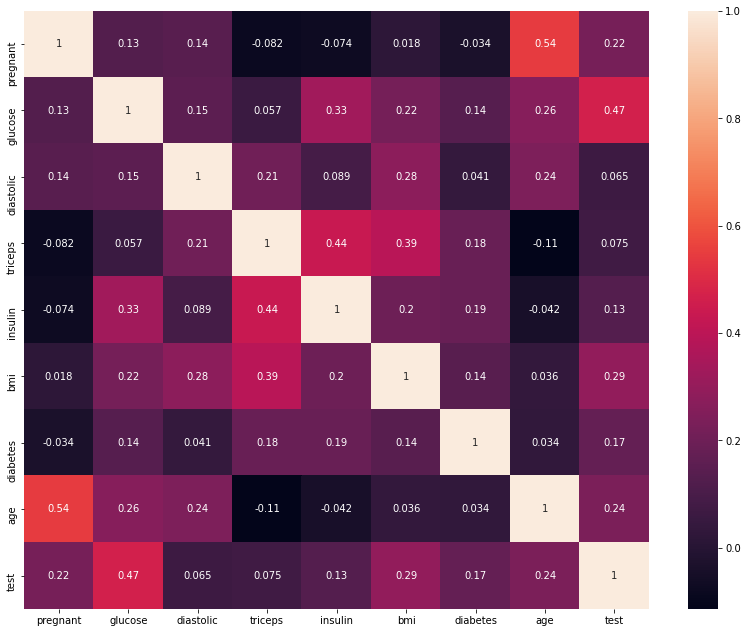

In [12]:
plt.figure(figsize=(14, 11))
sns.heatmap(df.corr(), annot = True)

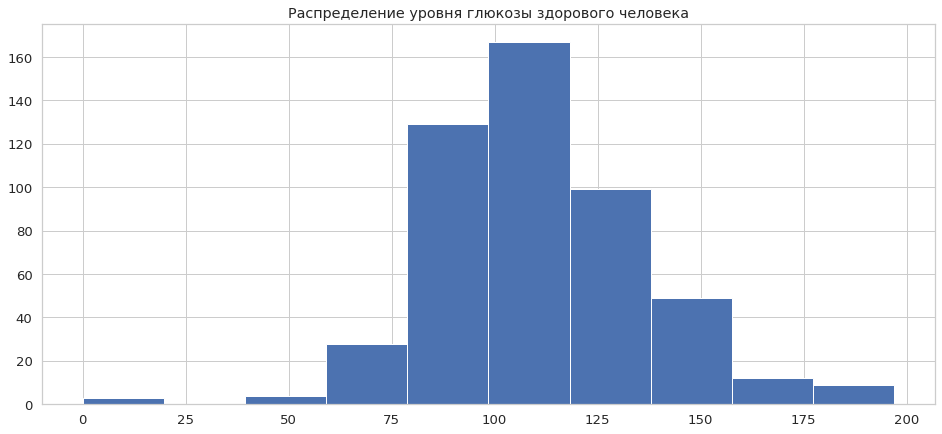

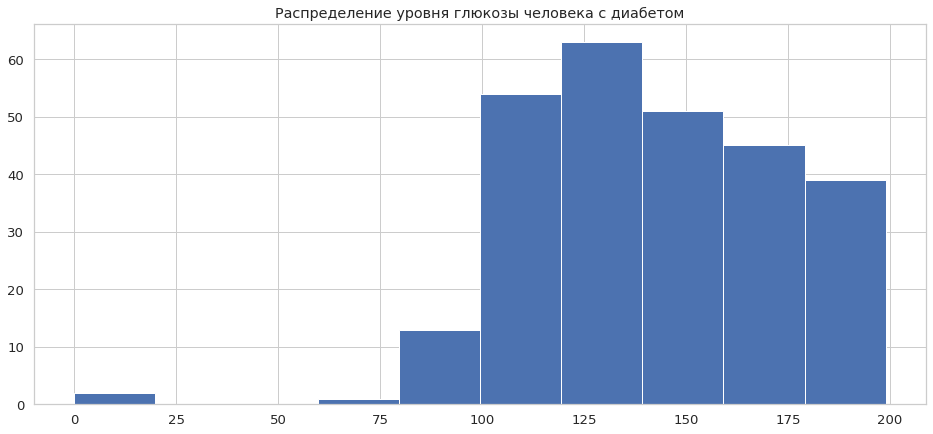

In [91]:
plt.figure(figsize = (16, 7))
plt.title('Распределение уровня глюкозы здорового человека')
plt.hist(df.loc[df['test']==0].glucose)
# plt.gcf().autofmt_xdate()
plt.show()

plt.figure(figsize = (16, 7))
plt.title('Распределение уровня глюкозы человека с диабетом')
plt.hist(df.loc[df['test']==1].glucose)
# plt.gcf().autofmt_xdate()
plt.show()

# Соотношение заболеваемости диабетом

In [13]:
num_obs = len(df)
num_true = len(df.loc[df['test'] == 1])
num_false = len(df.loc[df['test'] == 0])
print("Число с диабетом:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Число без диабета: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Число с диабетом:  268 (34.90%)
Число без диабета: 500 (65.10%)


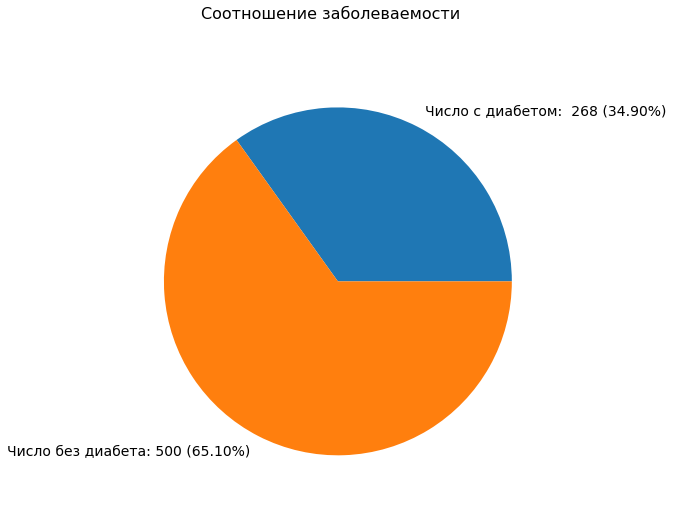

In [17]:
figure = plt.figure(figsize = (8, 8))
figure.suptitle('Соотношение заболеваемости', fontsize=16)
plt.pie([num_true, num_false], labels = [
    "Число с диабетом:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100),
    "Число без диабета: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100)], textprops={'fontsize': 14})
plt.show()

В этом наборе данных есть ~34% случаев - имеют диабет. Это хорошее распределение так что больше никакой работы не требуется.

In [29]:
print("# rows in dataframe {0}".format(len(df)))
counts_zero = []
for column in list(df.columns)[:-1]:
    print("# rows missing "+column+": {0}".format(len(df.loc[df[column] == 0])))
    counts_zero.append(len(df.loc[df[column] == 0]))

# rows in dataframe 768
# rows missing pregnant: 111
# rows missing glucose: 5
# rows missing diastolic: 35
# rows missing triceps: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diabetes: 0
# rows missing age: 0


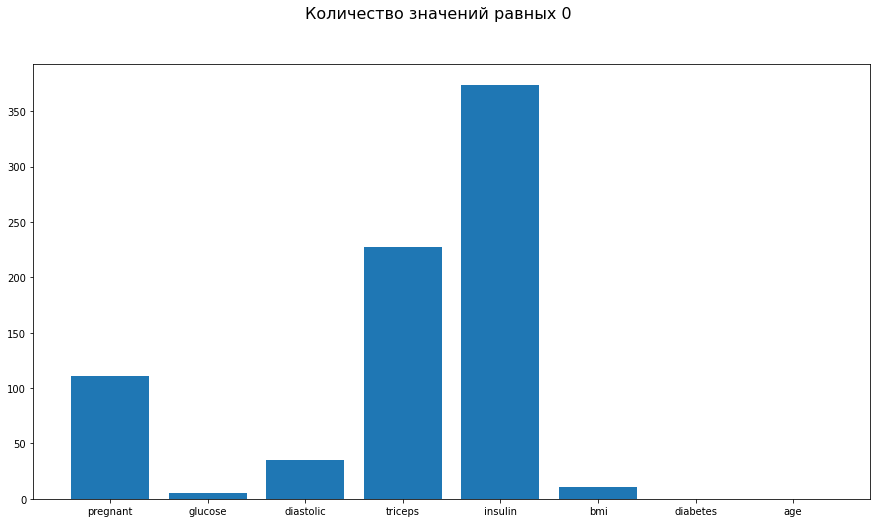

In [30]:
figure = plt.figure(figsize = (15, 8))
figure.suptitle('Количество значений равных 0', fontsize=16)
plt.bar(list(df.columns)[:-1], counts_zero)
plt.show()

In [25]:
df_filled = df.copy()

In [31]:
for column in df_filled.columns[1:-1]:
    df_filled[column] = df_filled[column].replace(to_replace=0, value = df[column].median())

In [32]:
print("# rows in dataframe {0}".format(len(df)))
for column in list(df_filled.columns)[:-1]:
    print("# rows missing "+column+": {0}".format(len(df_filled.loc[df_filled[column] == 0])))

# rows in dataframe 768
# rows missing pregnant: 111
# rows missing glucose: 0
# rows missing diastolic: 0
# rows missing triceps: 0
# rows missing insulin: 0
# rows missing bmi: 0
# rows missing diabetes: 0
# rows missing age: 0


# Кросс-валидация: подбор модели

кросс-валидация для 4 моделей - с незаполненными значениями, заполненными, без 1 поля, без 2х полей

In [35]:
from sklearn.preprocessing import MinMaxScaler as Scaler

dfs = [
    df.drop("test", axis=1), 
    df_filled.drop("test", axis=1), 
    df.drop(["test",'diastolic'], axis=1),  
    df.drop(["test",'diastolic', 'triceps'], axis=1)]
df_test = df['test'].copy()
df_scaled = []
scalers = []
for i in range(0, len(dfs)):
    scaler = Scaler()
    scaler.fit(dfs[i])
    df_scaled.append(scaler.transform(dfs[i]))
    scalers.append(scaler)

In [33]:
# Import all the algorithms we want to test
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
# Import the slearn utility to compare algorithms
from sklearn import model_selection

In [36]:
# Prepare an array with all the algorithms
models = [
    ('LR', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('NB', GaussianNB()),
    ('SVC', SVC()),
    ('LSVC', LinearSVC()),
    ('RFC', RandomForestClassifier()),
    ('DTR', DecisionTreeRegressor())
]

In [40]:
variants = []
variant = ['С незаполненными значениями', "Заполненными значениями по медиане", "Без diastolic", "Без diastolic & triceps"]
for i in range(0, len(variant)):
    accuracies = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(
            model, df_scaled[i], df_test, cv=kfold, scoring='accuracy')
        accuracies.append({'name':name,'mean':cv_results.mean(), 'std':cv_results.std(), 'results':cv_results})
    variants.append(pd.DataFrame(accuracies).sort_values('mean'))
variants[0]

,name,mean,std,results
6,DTR,0.705622,0.057567,"[0.6623376623376623, 0.7792207792207793, 0.662..."
1,KNN,0.744754,0.060567,"[0.6623376623376623, 0.8571428571428571, 0.675..."
2,NB,0.755178,0.042766,"[0.6753246753246753, 0.8051948051948052, 0.753..."
5,RFC,0.764252,0.069824,"[0.6753246753246753, 0.8311688311688312, 0.740..."
0,LR,0.768250,0.048100,"[0.7012987012987013, 0.8181818181818182, 0.740..."
3,SVC,0.770830,0.051084,"[0.6883116883116883, 0.8441558441558441, 0.727..."
4,LSVC,0.772163,0.049933,"[0.7012987012987013, 0.8181818181818182, 0.740..."


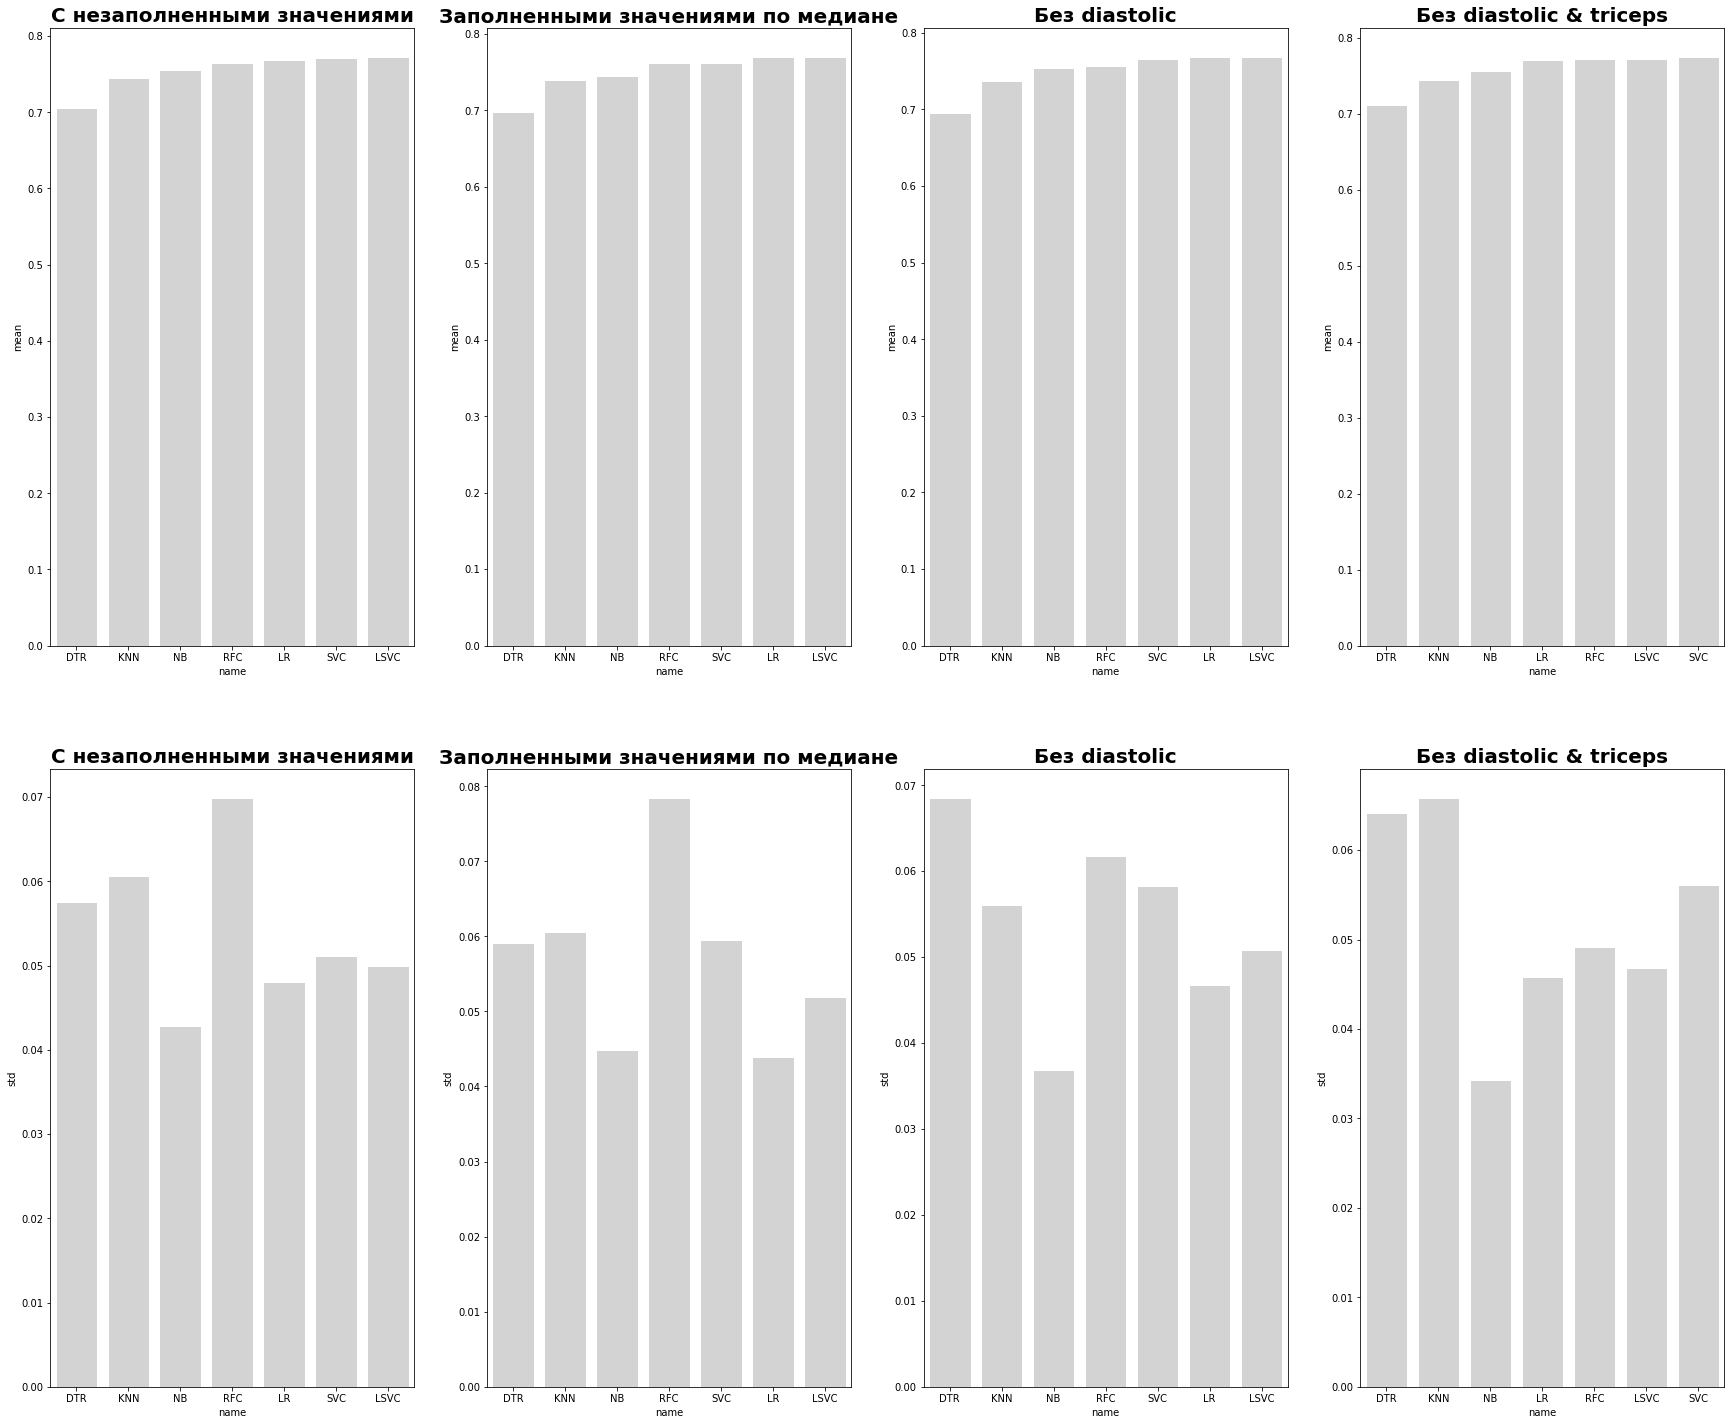

In [41]:
fig, axs = plt.subplots(ncols=4, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
for i in range(0, 4):
    sns.barplot(x='name', y='mean', data=variants[i], ax=axs[0,i], color='lightgrey')
    axs[0,i].set_title(label = variant[i], size=20, weight='bold')
for i in range(0, 4):
    sns.barplot(x='name', y='std', data=variants[i], ax=axs[1,i], color='lightgrey')
    axs[1,i].set_title(label = variant[i], size=20, weight='bold')

Шпаргалка

<img src="https://upload.wikimedia.org/wikipedia/commons/3/32/Densityvsbox.png"></img>

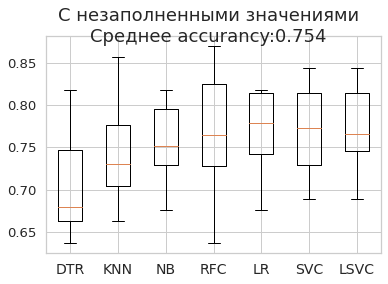

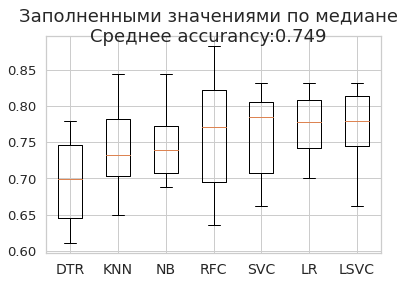

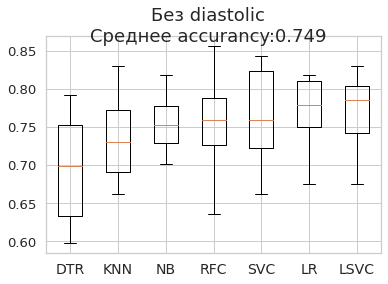

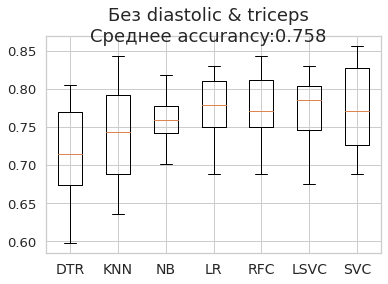

In [44]:
sns.set(style="whitegrid", color_codes=True, font_scale = 1.2)
for i in range(0, 4):
    fig = plt.figure()
    fig.suptitle(variant[i]+'\nСреднее accurancy:'+str(round(variants[i]['mean'].mean(),3)), size = 18)
    ax = fig.add_subplot(111)
    plt.boxplot(variants[i]['results'])
    ax.set_xticklabels(variants[i]['name'], size = 14)
    plt.show()

# Деление данных

In [46]:
# Split the training dataset in 70% / 30%
from sklearn.model_selection import train_test_split

train_set_labels = []
train_sets = []
test_set_labels = []
test_sets = []

train_set, test_set = train_test_split(
    df, test_size=0.3, random_state=42)

train_set_labels.append(train_set["test"].copy())
train_sets.append(train_set.drop("test", axis=1))

test_set_labels.append(test_set["test"].copy())
test_sets.append(test_set.drop("test", axis=1))

train_set, test_set = train_test_split(
    df_filled, test_size=0.3, random_state=42)

train_set_labels.extend([train_set["test"].copy(), train_set["test"].copy(), train_set["test"].copy()])
train_sets.extend([
    train_set.drop("test", axis=1), 
    train_set.drop(["test",'diastolic'], axis=1),  
    train_set.drop(["test",'diastolic', 'triceps'], axis=1)])

test_set_labels.extend([test_set["test"].copy(), test_set["test"].copy(), test_set["test"].copy()])
test_sets.extend([
    test_set.drop("test", axis=1), 
    test_set.drop(["test",'diastolic'], axis=1),  
    test_set.drop(["test",'diastolic', 'triceps'], axis=1)])

# Нормализация данных

In [47]:
from sklearn.preprocessing import MinMaxScaler as Scaler

train_set_scaled = []
test_set_scaled = []

scalers = []
for i in range(0, len(train_sets)):
    scaler = Scaler()
    scaler.fit(train_sets[i])
    train_set_scaled.append(scaler.transform(train_sets[i]))
    test_set_scaled.append(scaler.transform(test_sets[i]))
    scalers.append(scaler)

In [48]:
df = pd.DataFrame(data=train_set_scaled[0], columns = train_sets[0].columns)
df.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age
0,0.058824,0.477387,0.491803,0.285714,0.068558,0.356185,0.077711,0.016667
1,0.294118,0.527638,0.590164,0.460317,0.384161,0.549925,0.034586,0.116667
2,0.000000,0.678392,0.557377,0.666667,0.295508,0.630402,0.122545,0.050000
3,0.235294,0.658291,0.557377,0.333333,0.196217,0.493294,0.035013,0.116667
4,0.058824,0.517588,0.245902,0.603175,0.098109,0.645306,0.044833,0.200000


# Моделирование

In [49]:
#логер
def log_progress(sequence, every=None, size=None):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display
    
    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = size / 200     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)
    
    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{index} / ?'.format(index=index)
                else:
                    progress.value = index
                    label.value = u'{index} / {size}'.format(
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = str(index or '?')

In [61]:
from sklearn.model_selection import GridSearchCV

best_models_labels = [ 'RFC', 'RFC','SVC', 'SVC']
best_models = [
    RandomForestClassifier(), 
    RandomForestClassifier(), 
    SVC(probability=True), 
    SVC(probability=True) 
]

param_grid={
    'RFC':{
        'n_estimators'  : [200, 700],
        'max_features'  : ['auto', 'sqrt', 'log2'],
        "criterion"     : ["gini", "entropy"],
        "max_features"  : [3, 5],
        'max_depth'     : [8, 9, 10, 11, 12]
    },
    'LSVC':{
        'C':np.arange(0.01,100,10)
    },
    'SVC':{
      'C': [1.0, 10.0, 50.0],
      'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
      'shrinking': [True, False],
      'gamma': ['auto', 1, 0.1],
      'coef0': [0.0, 0.1, 0.5]
    }
    
}
grids_search = []
for i in log_progress(range(4), 1):
    model = best_models[i]
    if best_models_labels[i] == 'RFC':
        grid_search = GridSearchCV(model, param_grid[best_models_labels[i]], cv=5, scoring='accuracy')
    else:
        grid_search = GridSearchCV(model, param_grid[best_models_labels[i]], cv=10, scoring='accuracy')
    # model_svc = LinearSVC(random_state = 42)
    # grid_search = GridSearchCV(
    #     model_svc, {'C':np.arange(0.01,100,10)}, cv=5, scoring='accuracy')
    grid_search.fit(train_set_scaled[i], train_set_labels[i])
    grids_search.append(grid_search)

In [62]:
best_scores = [grids_search[i].best_score_ for i in range(4)]

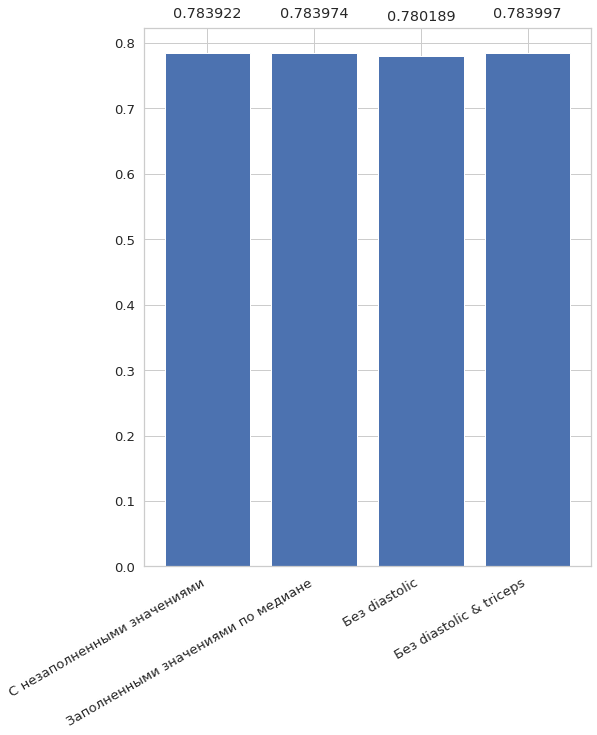

In [63]:
plt.figure(figsize=[8, 11])
plt.bar(variant, best_scores, )
for x, y in zip(np.arange(4), best_scores):
    plt.text(x, y + 0.05, '%f' % y, ha='center', va = 'bottom')
plt.gcf().autofmt_xdate()

In [67]:
models2 = []
for i in range(0, 4):
    m = grids_search[i].best_estimator_

    # Use the whole dataset to train the model
    X = np.append(train_set_scaled[i], test_set_scaled[i], axis=0)
    Y = np.append(train_set_labels[i], test_set_labels[i], axis=0)

    # Train the model
    m.fit(X, Y)
    print(m.fit(X, Y))
    models2.append(m)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=11, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_s

# Прогнозирование

In [68]:
df.values

array([[0.05882353, 0.47738693, 0.49180328, ..., 0.3561848 , 0.07771136,
        0.01666667],
       [0.29411765, 0.52763819, 0.59016393, ..., 0.54992548, 0.03458582,
        0.11666667],
       [0.        , 0.67839196, 0.55737705, ..., 0.63040238, 0.12254483,
        0.05      ],
       ...,
       [0.58823529, 0.50753769, 0.70491803, ..., 0.67958271, 0.45175064,
        0.28333333],
       [0.        , 0.70854271, 0.        , ..., 0.6318927 , 0.05422716,
        0.13333333],
       [0.        , 0.6281407 , 0.78688525, ..., 0.33532042, 0.07856533,
        0.        ]])

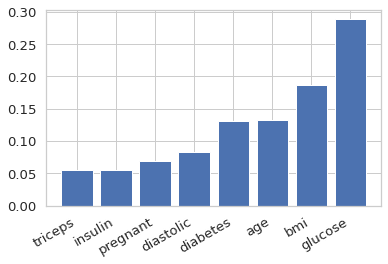

In [69]:
temp_df = pd.DataFrame({'name':df.columns, 'importance':models2[0].feature_importances_}).sort_values('importance')
plt.bar(temp_df.name, temp_df.importance)
plt.gcf().autofmt_xdate()

In [79]:
# We create a new (fake) person having the three most correated values high
new_df = pd.DataFrame([[1, 99, 64, 22, 76, 27, 0.25, 25]]) 
# We scale those values like the others
new_df_scaled = scalers[0].transform(new_df)
# We predict the outcome
models2[0].predict(new_df_scaled), models2[0].predict_proba(new_df_scaled)

(array([0]), array([[0.94846591, 0.05153409]]))

In [78]:
# We create a new (fake) person having the three most correated values high
new_df = pd.DataFrame([[1, 99, 64, 22, 76, 27, 0.25, 25]]) 
# We scale those values like the others
new_df_scaled = scalers[1].transform(new_df)
# We predict the outcome
models2[1].predict(new_df_scaled), models2[1].predict_proba(new_df_scaled)

(array([0]), array([[0.96969027, 0.03030973]]))

In [72]:
df_filled.loc[df_filled['pregnant']==1].loc[df_filled.glucose==99]

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
567,1,99,72,30,18.0,38.6,0.412,21,0
672,1,99,58,10,30.5,25.4,0.551,21,0


In [74]:
# We create a new (fake) person having the three most correated values high
new_df = pd.DataFrame([[1, 99, 22, 76, 27, 0.25, 25]])
# We scale those values like the others
new_df_scaled = scalers[2].transform(new_df)
# We predict the outcome
models2[2].predict(new_df_scaled), models2[2].predict_proba(new_df_scaled)

(array([0]), array([[0.92167574, 0.07832426]]))

In [76]:
# We create a new (fake) person having the three most correated values high
new_df = pd.DataFrame([[1, 99, 76, 27, 0.25, 25]])
# We scale those values like the others
new_df_scaled = scalers[3].transform(new_df)
# We predict the outcome
models2[3].predict(new_df_scaled), models2[3].predict_proba(new_df_scaled)

(array([0]), array([[0.90276169, 0.09723831]]))